In [1]:
#数据预处理
%matplotlib inline
import numpy as np
#import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

#不加下面这一步进程很容易中断
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["OMP_NUM_THREADS"] = '9' 

#---------------------------------------------------
import sklearn
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#加载模型：
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#---------------------------
from sklearn.model_selection import GridSearchCV

In [2]:
#一些函数
# get_train_test
# get_dat->train_model
# model

#获得分折好的数据集
def get_data(data,name):
    train_data = data #train[0] / test[0]
    target_name = name #"y4"
    #读
    df= train_data
    features=df.columns.tolist()
    features.remove( target_name )
    y=df[ target_name ]
    X=df[features].values
    return X,y

In [3]:
#读取最开始的数据
fpath="./lasso/5_train_liux_subx.xlsx"
df=pd.read_excel(fpath)

In [4]:
X,y = get_data(df,"随访>=3")

"""
from sklearn.ensemble import RandomForestClassifier
#para = {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
para = {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1,  'n_estimators': 8}
model = RandomForestClassifier(**para)
model.fit(X, y)
#"""

#"""
import xgboost as xgb
para = {'max_depth': 2,  'n_estimators': 7,}#'min_child_weight': 0.3, # 'scale_pos_weight': 2.4
model = xgb.XGBClassifier(**para)
model.fit(X, y)
#"""

"""
from sklearn.linear_model import LogisticRegression
para = {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
model = LogisticRegression(**para)
model.fit(X, y)
#"""

# 预测概率
y_probabilities_1 = model.predict_proba(X)


#读取最开始的数据
fpath="./lasso/6_test_liux_subx.xlsx"
df=pd.read_excel(fpath)
X,y = get_data(df,"随访>=3")
y_probabilities_2 = model.predict_proba(X)

In [5]:
y_probabilities_1[:,1]
y_probabilities_2[:,1]

array([0.20686738, 0.4251113 , 0.21073796, 0.24905178, 0.16759513,
       0.21073796, 0.5433369 , 0.52716166, 0.4251113 , 0.30586234,
       0.228622  , 0.21842921, 0.30788636, 0.5243258 , 0.60228914,
       0.29330626, 0.15923432, 0.44054613, 0.61265486, 0.46375182,
       0.18718971, 0.43247545, 0.21073796, 0.15294333, 0.41250283,
       0.13710994, 0.15923432, 0.21842921, 0.3241998 , 0.28350443,
       0.32428682, 0.40447873, 0.43247545, 0.30788636, 0.5086242 ,
       0.24905178, 0.30748865, 0.2768416 , 0.16759513, 0.69780046,
       0.24905178, 0.22622833, 0.27946877, 0.18718971, 0.15923432,
       0.4251113 , 0.23715433, 0.174895  , 0.75824916, 0.6729846 ,
       0.13990556, 0.19423304, 0.23715433, 0.10636047, 0.4017421 ,
       0.40447873, 0.7223781 , 0.17910545], dtype=float32)

In [6]:
np.concatenate((y_probabilities_1[:,1], y_probabilities_2[:,1]))

array([0.5054743 , 0.5142115 , 0.7051219 , 0.21842921, 0.5142115 ,
       0.24905178, 0.11310604, 0.67947024, 0.15294333, 0.5433369 ,
       0.38900265, 0.5243258 , 0.46460536, 0.28350443, 0.37919953,
       0.20763832, 0.35812107, 0.44107622, 0.5054743 , 0.33860716,
       0.60228914, 0.42203435, 0.38900265, 0.15923432, 0.15294333,
       0.5086242 , 0.15923432, 0.39368683, 0.69780046, 0.72968227,
       0.19423304, 0.52716166, 0.37919953, 0.4251113 , 0.38374242,
       0.6725901 , 0.67947024, 0.29399657, 0.67947024, 0.5433369 ,
       0.21504188, 0.40447873, 0.75046057, 0.67947024, 0.5086242 ,
       0.706011  , 0.15923432, 0.2025747 , 0.46224996, 0.27946877,
       0.23715433, 0.15923432, 0.24905178, 0.28350443, 0.706011  ,
       0.16515058, 0.7365229 , 0.64675206, 0.43797177, 0.6900008 ,
       0.785712  , 0.35249633, 0.20763832, 0.42142534, 0.55955964,
       0.5282343 , 0.6094687 , 0.40447873, 0.6417216 , 0.61265486,
       0.6888635 , 0.3101954 , 0.26435632, 0.3967676 , 0.15923

In [7]:
score = np.concatenate((y_probabilities_1[:,1], y_probabilities_2[:,1]))

In [8]:
score = pd.DataFrame({'score': score})

In [9]:
score

,score
0,0.505474
1,0.514211
2,0.705122
3,0.218429
4,0.514211
...,...
213,0.106360
214,0.401742
215,0.404479
216,0.722378


In [10]:
type(score)

pandas.core.frame.DataFrame

In [11]:
fpath="./lasso_/label.xlsx"
df_label=pd.read_excel(fpath)

In [12]:
score = pd.concat([df_label, score], axis=1)
#score[["随访>=3"]] = df_label[["随访>=3"]]
#score.rename(columns={'ID': '随访>=3'}, inplace=True)

In [13]:
score

,随访>=3,score
0,1,0.505474
1,0,0.514211
2,1,0.705122
3,0,0.218429
4,1,0.514211
...,...,...
213,0,0.106360
214,0,0.401742
215,0,0.404479
216,1,0.722378


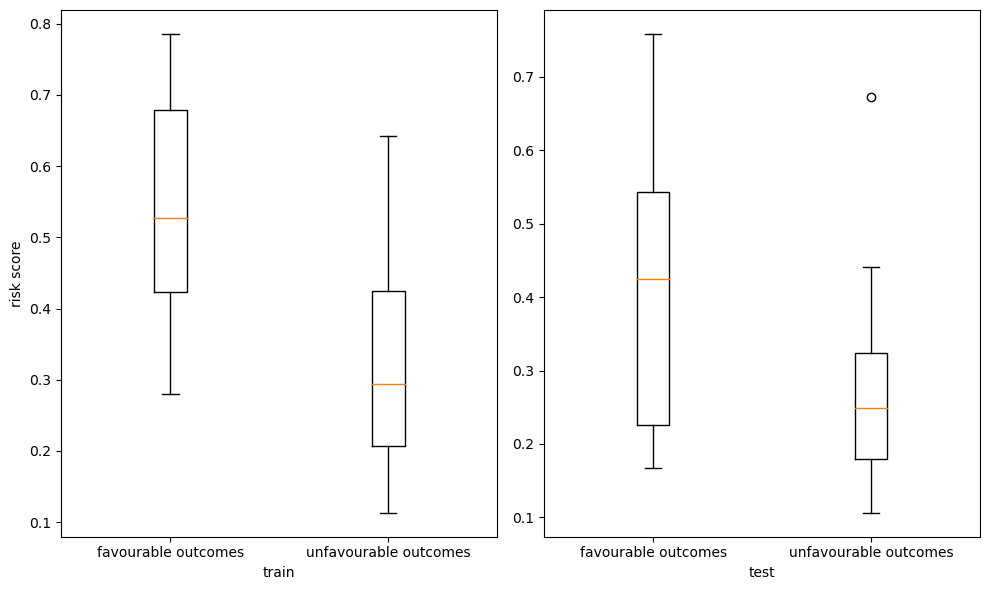

In [21]:
df1 = score.head(160)
df2 = score.tail(58)

# 设置图形大小
plt.figure(figsize=(10, 6))

# 在df1中，特征值为1的箱图
# 在df1中，特征值为0的箱图
plt.subplot(1, 2, 1)
plt.boxplot([ df1[df1['随访>=3'] == 1]['score'] , df1[df1['随访>=3'] == 0]['score'] ],
           labels=['favourable outcomes', 'unfavourable outcomes'])
plt.xlabel('train')
plt.ylabel('risk score')

# 在df2中，特征值为1的箱图
# 在df2中，特征值为0的箱图
plt.subplot(1, 2, 2)
plt.boxplot([ df2[df2['随访>=3'] == 1]['score'] , df2[df2['随访>=3'] == 0]['score'] ],
           labels=['favourable outcomes', 'unfavourable outcomes'])
plt.xlabel('test')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

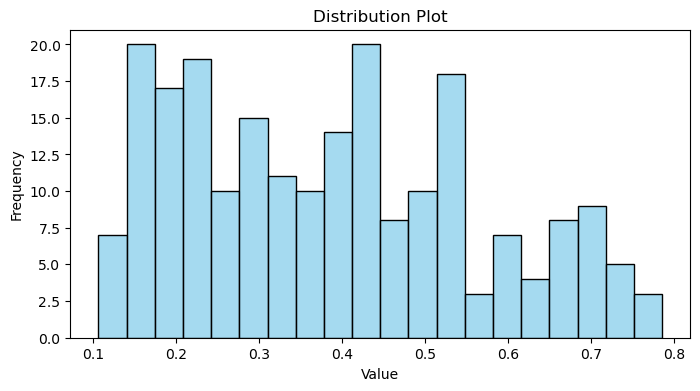

In [17]:
#观看score在测试和训练集上的分布（箱
#看score整个的分布


# 画分布条形图
plt.figure(figsize=(8, 4))
sns.histplot(score['score'], bins=20, kde=False, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [18]:
fpath_out="./lasso_/XB_score.xlsx"
score.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

In [22]:
#读取最开始的数据
fpath="./data/norm_2_test_img_sub.xlsx"
df=pd.read_excel(fpath)

In [23]:
need = df.columns.tolist()[]

['ID',
 'liu_original_shape_Elongation',
 'liu_original_shape_Flatness',
 'liu_original_shape_LeastAxisLength',
 'liu_original_shape_MajorAxisLength',
 'liu_original_shape_Maximum2DDiameterColumn',
 'liu_original_shape_Maximum2DDiameterRow',
 'liu_original_shape_Maximum2DDiameterSlice',
 'liu_original_shape_Maximum3DDiameter',
 'liu_original_shape_MeshVolume',
 'liu_original_shape_MinorAxisLength',
 'liu_original_shape_Sphericity',
 'liu_original_shape_SurfaceArea',
 'liu_original_shape_SurfaceVolumeRatio',
 'liu_original_shape_VoxelVolume',
 'liu_original_firstorder_10Percentile',
 'liu_original_firstorder_90Percentile',
 'liu_original_firstorder_Energy',
 'liu_original_firstorder_Entropy',
 'liu_original_firstorder_InterquartileRange',
 'liu_original_firstorder_Kurtosis',
 'liu_original_firstorder_Maximum',
 'liu_original_firstorder_MeanAbsoluteDeviation',
 'liu_original_firstorder_Mean',
 'liu_original_firstorder_Median',
 'liu_original_firstorder_Minimum',
 'liu_original_firstorder